## Examen Final
### Nombre:Edison Huinaizaca
1)	Evaluar el riesgo financiero de sus clientes que requieren la recomendación de películas. Para evaluar el riesgo financiero se toma en cuenta la edad del asegurado y su porcentaje de manejo durante el año. Para ello se tiene las siguientes reglas y la función de pertinencia.

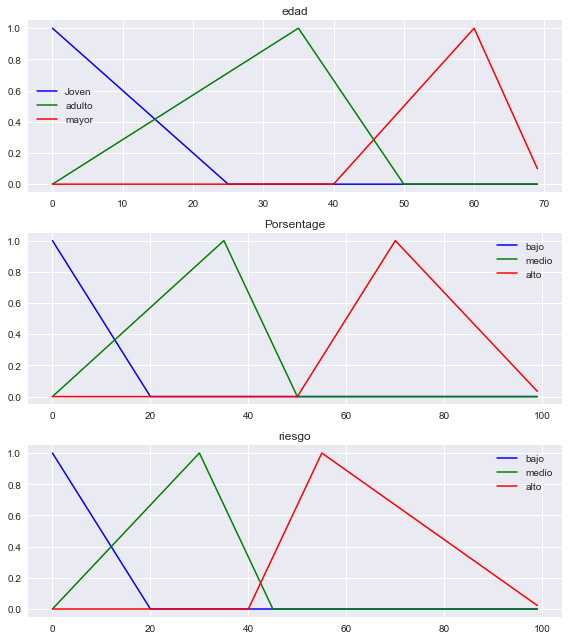

In [92]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generar variables del universo 
# * Calidad y servicio en rangos subjetivos [0, 70] 
# * Tip tiene un rango de [0, 100] en unidades de puntos porcentuales 
x_qual = np.arange(0, 70, 1)
x_serv = np.arange(0, 100, 1)
x_tip  = np.arange(0, 100, 1)

# Generar funciones de pertenencia difusas 
qual_lo = fuzz.trimf(x_qual, [0, 0, 25])
qual_md = fuzz.trimf(x_qual, [0, 35, 50])
qual_hi = fuzz.trimf(x_qual, [40, 60, 70])


serv_lo = fuzz.trimf(x_serv, [0, 0, 20])
serv_md = fuzz.trimf(x_serv, [0, 35, 50])
serv_hi = fuzz.trimf(x_serv, [50, 70, 100])

tip_lo = fuzz.trimf(x_tip, [0, 0, 20])
tip_md = fuzz.trimf(x_tip, [0,30, 45])
tip_hi = fuzz.trimf(x_tip, [40, 55, 100])
# Visualice estos universos y funciones de pertenencia
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Joven')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='adulto')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='mayor')
ax0.set_title('edad')
ax0.legend()
ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='bajo')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='medio')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='alto')
ax1.set_title('Porsentage')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='bajo')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='medio')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='alto')
ax2.set_title('Riesgo')
ax2.legend()

# Apague los ejes superior / derecho 
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


respuesta 24.999999999999996


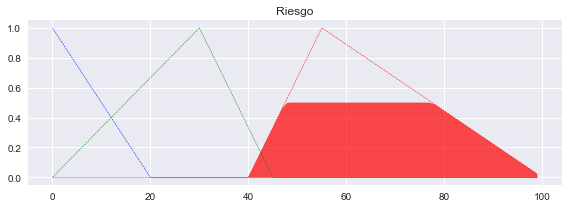

In [95]:
# Necesitamos la activación de nuestras funciones de pertenencia difusa en estos valores. 
# Los valores exactos 65 y 98%
# ¡Para esto existe fuzz.interp_membership! 
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 65)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 65)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 65)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 98)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 98)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 98)
# Ahora tomamos nuestras reglas y las aplicamos. La regla 1 se refiere a la edad  o porsentage
# El operador OR significa que tomamos el máximo de estos dos. 
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)


tip_activation_lo = np.fmin(active_rule1, tip_lo)   # elimina enteramente a 0

# Para la regla 2, conectamos el servicio aceptable a la propina media 
tip_activation_md = np.fmin(serv_level_md, tip_md)

active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

# Visualisa
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Riesgo')

# Apague los ejes superior / derecho 
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
#Imprime centroyde
centroide = fuzz.defuzz(x_tip, tip_md, 'centroid')
print("respuesta",centroide)

2)	Generar números aleatorios para la edad y el porcentaje de manejo con el objetivo de generar al menos 100 personas y ademas incluir el listado de películas vistas y el valor del rating de cada película. Al menos 50 películas y un total de nodos de al menos 350 nodos.

In [97]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/gabvilpi/film-scrap/master/filmaffinity.csv')
df

,id,titulo,año,duracion (min),pais,direccion,guion,musica,fotografia,productora,reparto,genero,sinopsis,nota,votaciones,web
0,223427.0,"Shake, Rattle and Rock!",1994.0,83.0,Estados Unidos,['Allan Arkush'],['Trish Soodik'],['Joseph L. Altruda'],['Jean de Segonzac'],['Spelling Films International. Distribuida po...,"['Renée Zellweger', 'Howie Mandel', 'Patricia ...","[['Drama'], ['Comedia']]",Dos chicas montan una banda y abren un club no...,NaN,NaN,https://www.filmaffinity.com/es/film223427.html
1,991203.0,Y a des limites,2014.0,97.0,Francia,['Charly Cassan'],['NA'],['NA'],['NA'],['Reportage 34'],"['Michel Coste', 'Henri Cohen', 'Antony Cintur...",[['Comedia']],NaN,NaN,NaN,https://www.filmaffinity.com/es/film991203.html
2,121407.0,¡...Y a Dios que me perdone!,2017.0,103.0,Rep. Dominicana,['Ángel Muñiz'],['Ángel Muñiz'],"['Sebastian Cabrera Chelin', 'Peyi Guzmán']",['Peyi Guzmán'],['Estudio Quitasueño'],"['Johnnie Mercedes', 'Clara Luz Lozano', 'Akhu...",[['Drama']],Es la historia de Toribio Sosa (Jhonny Mercede...,NaN,NaN,https://www.filmaffinity.com/es/film121407.html
3,646222.0,¿Y a mí quién me cuida? (I a mi qui em cuida?)...,2007.0,90.0,España,['Ángeles González-Sinde'],"['Carmen Pombero', 'Pepa Álvarez', 'Marta Durán']",['Alfredo Valero'],['Daniel Sosa Segura'],['Omnibus Pictures / Steinweg Emotion Pictures...,"['Julieta Serrano', 'Antonio de la Torre', 'Ad...","[['Drama'], ['Comedia']]",Ana es una anciana que acaba de quedarse viuda...,"1,5",107.000,https://www.filmaffinity.com/es/film646222.html
4,515608.0,"Et vous sinon, ça va? (S)",2010.0,12.0,Francia,['Emmanuel Broussouloux'],['Emmanuel Broussouloux'],['Emmanuel Broussouloux'],['Virginie Pichot'],['Sensito Films'],"['François Bégaudeau', 'Paulin Fodouop', 'Juli...",[['Drama']],"Enfrentado a un problema conyugal, el director...",NaN,NaN,https://www.filmaffinity.com/es/film515608.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,616931.0,Yves Saint Laurent,2014.0,101.0,Francia,['Jalil Lespert'],"['Jacques Fieschi', 'Jérémie Guez', 'Marie-Pie...",['NA'],['Thomas Hardmeier'],['SND / Wy Productions'],"['Pierre Niney', 'Guillaume Gallienne', 'Charl...",[['Drama']],"París, 1957. Con apenas 21 años, el diseñador ...","5,2",1.345,https://www.filmaffinity.com/es/film616931.html
1777,313393.0,"Yves Saint Laurent - Pierre Bergé, l'amour fou",2010.0,98.0,Francia,['Pierre Thoretton'],['Pierre Thoretton'],['Côme Aguiar'],['Leo Hinstin'],['Les Films du Lendemain / Les Films de Pierre...,"['Documentary', 'Yves Saint Laurent', 'Pierre ...",[['Documental']],Documental sobre la relación entre el modisto ...,"6,3",106.000,https://www.filmaffinity.com/es/film313393.html
1778,590764.0,Yvone Kane,2014.0,117.0,Mozambique,['Margarida Cardoso'],['Margarida Cardoso'],['NA'],['Joao Ribeiro'],['Coproducción Mozambique-Portugal-Brasil; Fil...,"['Beatriz Batarda', 'Irene Ravache', 'Samuel M...",[['Drama']],"Tras la muerte de su hija, Rita regresa al paí...",NaN,NaN,https://www.filmaffinity.com/es/film590764.html
1779,675413.0,Yvonne la Nuit,1949.0,97.0,Italia,['Giuseppe Amato'],"['Fabrizio Sarazani', 'Oreste Biancoli', 'Gius...",['Pasquale Frustaci'],['Mario Craveri (B&W)'],['Amato Film / Rizzoli Film'],"['Olga Villi', 'Totò', 'Frank Latimore', 'Edua...","[['Drama'], ['Romance']]",El teniente Carlo Rutelli se enamora de la bel...,NaN,NaN,https://www.filmaffinity.com/es/film675413.html


In [98]:
df=df.loc[:,['titulo']]
df

,titulo
0,"Shake, Rattle and Rock!"
1,Y a des limites
2,¡...Y a Dios que me perdone!
3,¿Y a mí quién me cuida? (I a mi qui em cuida?)...
4,"Et vous sinon, ça va? (S)"
...,...
1776,Yves Saint Laurent
1777,"Yves Saint Laurent - Pierre Bergé, l'amour fou"
1778,Yvone Kane
1779,Yvonne la Nuit


In [99]:
import random
n=1781
nota = [random.randint(1,6) for _ in range(n)]

In [100]:
df["calificacion"] = pd.Series(nota, dtype="Int64")
df

,titulo,calificacion
0,"Shake, Rattle and Rock!",5
1,Y a des limites,4
2,¡...Y a Dios que me perdone!,6
3,¿Y a mí quién me cuida? (I a mi qui em cuida?)...,3
4,"Et vous sinon, ça va? (S)",5
...,...,...
1776,Yves Saint Laurent,6
1777,"Yves Saint Laurent - Pierre Bergé, l'amour fou",6
1778,Yvone Kane,4
1779,Yvonne la Nuit,5


In [101]:
import random
n=1781
resultado = [random.randint(1,100) for _ in range(n)]
#print(resultado)

In [102]:
df["edad"] = pd.Series(resultado, dtype="Int64")
df

,titulo,calificacion,edad
0,"Shake, Rattle and Rock!",5,15
1,Y a des limites,4,67
2,¡...Y a Dios que me perdone!,6,70
3,¿Y a mí quién me cuida? (I a mi qui em cuida?)...,3,40
4,"Et vous sinon, ça va? (S)",5,76
...,...,...,...
1776,Yves Saint Laurent,6,5
1777,"Yves Saint Laurent - Pierre Bergé, l'amour fou",6,18
1778,Yvone Kane,4,31
1779,Yvonne la Nuit,5,33


In [1]:
import csv
with open('datos.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
         print(row['titulo'])
         print(row['titulo'])
         print(row['edad'])
         print(row['calificacion'])

Shake, Rattle and Rock!
Shake, Rattle and Rock!
6
2
Y a des limites
Y a des limites
65
2
¡...Y a Dios que me perdone!
¡...Y a Dios que me perdone!
32
3
¿Y a mí quién me cuida? (I a mi qui em cuida?) (TV)
¿Y a mí quién me cuida? (I a mi qui em cuida?) (TV)
81
6
Et vous sinon, ça va? (S)
Et vous sinon, ça va? (S)
95
6
Y Adán y
Y Adán y
76
6
Et maintenant, on va où? (Where Do We Go Now?)
Et maintenant, on va où? (Where Do We Go Now?)
97
3
And Now... Ladies and Gentlemen
And Now... Ladies and Gentlemen
50
6
Y ahora elogiemos las películas (S)
Y ahora elogiemos las películas (S)
86
2
Testa t'ammazzo, croce... sei morto... Mi chiamano Alleluja (Y ahora le llaman Aleluya)
Testa t'ammazzo, croce... sei morto... Mi chiamano Alleluja (Y ahora le llaman Aleluya)
61
4
Little Man, What Now?
Little Man, What Now?
46
3
¿Y ahora qué hago? (TV Series)
¿Y ahora qué hago? (TV Series)
36
4
¿Y ahora qué, señor fiscal?
¿Y ahora qué, señor fiscal?
45
1
Y, ahora, una de ladrones (S)
Y, ahora, una de ladrones 

Ich und die Kaiserin
59
1
Moi et les hommes de 40 ans
Moi et les hommes de 40 ans
37
3
Moulton og meg (Me and My Moulton) (S)
Moulton og meg (Me and My Moulton) (S)
100
2
Yo y mi terraza (S)
Yo y mi terraza (S)
28
1
Me Myself I (Me, Myself and I)
Me Myself I (Me, Myself and I)
55
6
Me, Myself & Irene
Me, Myself & Irene
29
3
Io, io, io... e gli altri
Io, io, io... e gli altri
96
4
Yo Yogi! (TV Series)
Yo Yogi! (TV Series)
76
3
I, Zombie: The Chronicles of Pain
I, Zombie: The Chronicles of Pain
5
3
Yoake Mae Yori Ruriiro na: Crescent Love (TV Series)
Yoake Mae Yori Ruriiro na: Crescent Love (TV Series)
90
3
Yeu woo bi (Yobi, the Five-Tailed Fox)
Yeu woo bi (Yobi, the Five-Tailed Fox)
62
6
Yochô: Sanpo suru Shinryakusha
Yochô: Sanpo suru Shinryakusha
70
2
Unterm Dirndl wird Gejodelt
Unterm Dirndl wird Gejodelt
40
3
Yoga
Yoga
30
2
Yoga Hakwon (Yoga Class) (Yoga Academy) (Yoga Institute)
Yoga Hakwon (Yoga Class) (Yoga Academy) (Yoga Institute)
84
5
Yoga Hosers
Yoga Hosers
52
5
Yoga Noga Rey

Znatizelja (S)
71
3
Zocta: Sólo en la Tierra se puede ser extraterrestre
Zocta: Sólo en la Tierra se puede ser extraterrestre
46
1
Zodiac
Zodiac
49
1
Zodiac - Evolution (S)
Zodiac - Evolution (S)
78
6
Zodiac Killer
Zodiac Killer
43
1
Curse of the Zodiac
Curse of the Zodiac
3
6
Zodiac Sign
Zodiac Sign
90
6
Zodiaque
Zodiaque
87
1
Zoe (S)
Zoe (S)
93
5
Zoe
Zoe
5
6
Zoe
Zoe
84
1
Zoé - Panoramas
Zoé - Panoramas
37
4
Zoé 08.11.14
Zoé 08.11.14
9
3
Zoe Gone
Zoe Gone
94
5
Z.O.E Dolores, i (Zone of Enders Dolores, i) (TV Series)
Z.O.E Dolores, i (Zone of Enders Dolores, i) (TV Series)
3
3
Wild Card
Wild Card
87
3
Zoé Kézako (TV Series)
Zoé Kézako (TV Series)
100
2
Zoe.Misplaced
Zoe.Misplaced
11
6
Zoey 101 (TV Series)
Zoey 101 (TV Series)
52
3
Zoey to the Max
Zoey to the Max
48
3
You Don't Mess With the Zohan
You Don't Mess With the Zohan
88
3
Zohi Sdom
Zohi Sdom
38
2
Zoids (TV Series)
Zoids (TV Series)
1
5
Zokkomon
Zokkomon
18
5
Zoku Hebihimesama
Zoku Hebihimesama
63
1
Zokubutsu zukan
Zokubutsu zu

In [15]:
from neo4j import GraphDatabase
import csv
uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri,auth=("neo4j", "cuenca"),encrypted=False )


#@unit_of_work(timeout=5)
def create_Pelicula(tx, name, edad, calificacion):
    return tx.run("CREATE (a:Peliculas {name: $name ,edad:$edad, calificacion:$calificacion}) RETURN id(a)", name=name,edad=edad,calificacion=calificacion).single().value()


def add_Pelicula( name, edad, calificacion):
    with driver.session() as session:
        return session.write_transaction(create_Pelicula, name, edad, calificacion)

with open('datos.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        add_Pelicula(row['titulo'], row['edad'], int(row['calificacion']) )
         
driver.close()

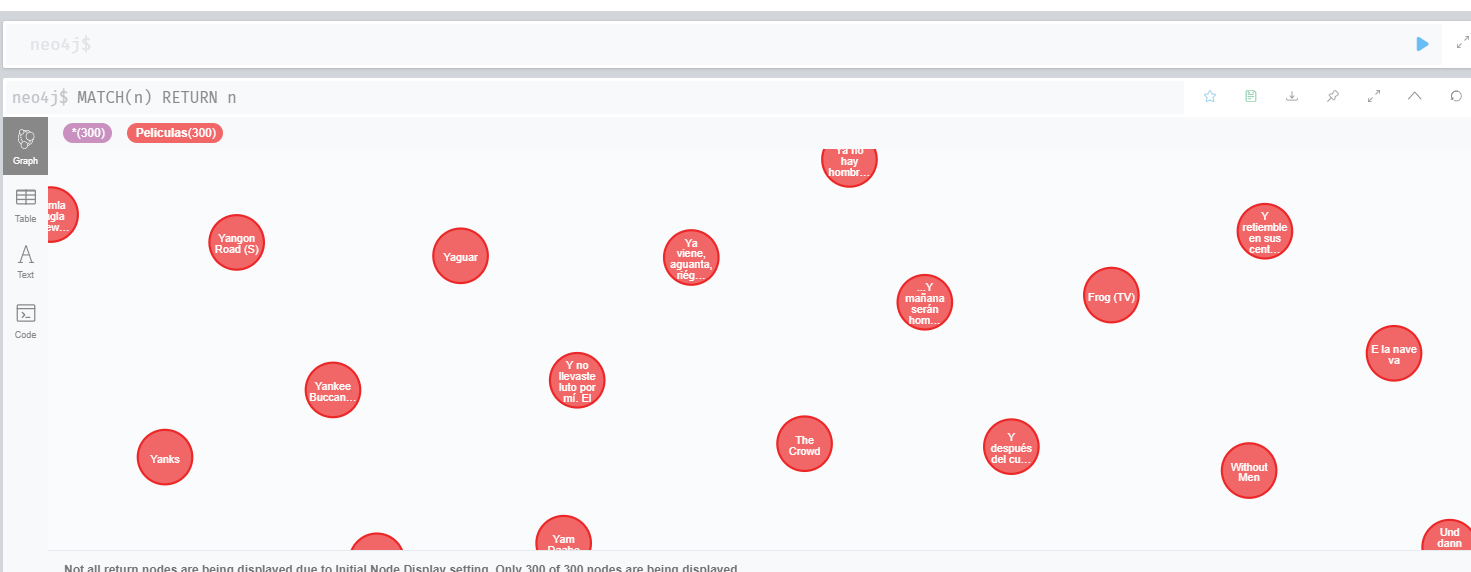

In [8]:
import random
n=1781
resultado = [random.randint(1,100) for _ in range(n)]
print(resultado[1])

95


3)	Con estos datos aplicar el algoritmo de KNN

In [17]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri,auth=("neo4j", "cuenca"),encrypted=False )


def get_friends_of(tx):
    friends = []
        
    result = tx.run("CALL gds.beta.knn.stream('myGraph', {topK: 1,nodeWeightProperty: 'calificacion',randomSeed: 6,concurrency: 1,sampleRate: 1.0,deltaThreshold: 0.0 })YIELD node1, node2, similarity RETURN gds.util.asNode(node1).name AS Pelicula1, gds.util.asNode(node2).name AS Pelicula2, similarity ORDER BY similarity DESCENDING, Pelicula1, Pelicula2")
    for record in result:
        friends.append(record['Pelicula1'])
        friends.append(record['Pelicula2'])
        friends.append(record['similarity'])
    return friends

with driver.session() as session:
    friends = session.read_transaction(get_friends_of)
    for friend in friends:
        print(friend)

driver.close()

#Ya (S)
Zvir (S)
1.0
#YoSoyBinks (S)
Zügürt Aga (The Agha)
1.0
...Altrimenti ci arrabbiamo
Zoo zéro
1.0
...And Your Name Is Jonah (TV)
Yo creo que...
1.0
...Y al tercer año, resucitó
Yakuza gurentai (893 Gurentai)
1.0
...Y de pronto el amanecer
Zafra
1.0
...Y del hijo (S)
Zombie Cop
1.0
...Y el cielo fue tomado por asalto
Yum, Yum, Yum! A Taste of Cajun and Creole Cooking
1.0
...Y el demonio creó a los hombres
Yossi & Jagger
1.0
...Y eligió el infierno
XV: Beyond the Tryline
1.0
...Y mañana serán hombres
Molodaya zhena
1.0
...Y mañana serán hombres
Zeppelin
1.0
...a páty jezdec je Strach
Zion and His Brother (Zion et son frère)
1.0
...e per tetto un cielo di stelle
Yo no soy guerrillero
1.0
...y tenemos sabor
Death Wish 4: The Crackdown
1.0
...ya no puede caminar (S)
X² (Double X)
1.0
15 août
Zatôichi chikemuri kaido
1.0
30 for 30: You Don't Know Bo: The Legend of Bo Jackson (TV)
X: Yochou
1.0
9/11: Ground Zero Underworld
Zoe
1.0
97 goo waak jai: Jin mo bat sing (Young and Dangerous 4)

1.0
Yasuhiko Yoshikazu Itano Ichiro Gensatsu-shuu (S)
Young MacGyver (TV)
1.0
Yasukuni
Yo-Kai Watch: Enma Daiô to Itsutsu no Monogatari da Nyan!
1.0
Yasuni
Taon noong ako'y anak sa labas
1.0
Yatarô gasa
Only the Lonely
1.0
Yatasto
Zampo y yo
1.0
Yatra
He Ran All the Way
1.0
Yatsuhaka-mura (Village of the Eight Tombs)
Xénogénèse (S)
1.0
Yatsurugi: Heat Up Your Yatsurugi Spirit
Kaze no yôjinbô (TV Series)
1.0
Yatterman: Shin Yatter Mecha Daishûgô! Omocha no Kuni de Daikessen da Koron!
Xfea2 (TV Series)
1.0
Yattâman (Yatterman)
Ydessa, les ours et etc.
1.0
Yattâman (Yatterman) (TV Series)
You're Gonna Miss Me
1.0
Yatzy
Kita no zeronen
1.0
Yaveños
Yûgiô Zearu (Yu-Gi-Oh! Zexal) (TV Series)
1.0
Yawar Fiesta
Zeinek gehiago iraun (S)
1.0
Yawar Wanka
I Accuse
1.0
Yawar mallku (La sangre del cóndor)
¿Y por qué no? (S)
1.0
Yawara!
Kikoku (Yakuza Demon)
1.0
Yawarpampa: Campo de sangre (S)
ZigZag
1.0
Yayoi Kusama: A Life in Polka Dots (Kusama: Infinity)
Zárás (S)
1.0
Yayos (S)
Youth
1.0
Yazgi
Yukon

Your Show of Shows (TV Series)
Yarará
1.0
Your Studio and You (S)
Yo maté a Juan Charrasqueado
1.0
Your Worst Nightmare (TV Series)
Zaïna, cavalière de l'Atlas
1.0
Yours (S)
Zigaretten (S)
1.0
Yours Emotionally!
Naughty Baby
1.0
Yours Sincerely, Lois Weber (S)
You Were Meant for Me
1.0
Yours Truly (S)
Zeroville
1.0
Yours for the Asking
XL
1.0
Youssou N'Dour: I Bring What I Love
Yasmine
1.0
Youth
Yunagi No Machi Sakura No kuni (Yunagi City, Sakura Country)
1.0
Youth (S)
I Am Bruce Lee (TV)
1.0
Youth Gets a Break (S)
Yawar mallku (La sangre del cóndor)
1.0
Youth in Oregon
Bloodeaters (Toxic Zombies)
1.0
Youth of Christ
Sapphire & Steel (TV Series)
1.0
Youth on Parade
Yaqui Drums
1.0
YouthMin
Yo me bajo en la próxima, ¿y usted?
1.0
Yowamushi Pedal (TV Series)
Behold a Pale Horse
1.0
Yoyes
And Now... Ladies and Gentlemen
1.0
Yoyo
Da i Da
1.0
Yoyochu: Sex to Yoyogi Tadashi no Sekai (Yoyochu in the Land of the Rising Sex)
Maai hung paak yan
1.0
Yoyotoki: Happy Ears (TV) (S)
I, the jury
1.0
Y

Zamora en el tiempo (S)
1.0
Zipper
Yusuf Yusuf
1.0
Zippo (S)
Can't Hardly Wait
1.0
Ziva istina
Yowamushi Pedal (TV Series)
1.0
Zivan Makes a Punk Festival
You Again? (TV Series)
1.0
Ziveli! Medicine for the Heart
Youssou N'Dour: I Bring What I Love
1.0
Zivi mrtvaci (S)
XP3D (Paranormal Xperience 3D)
1.0
Zizek!
Yo tengo perspectiva (de la vida)
1.0
Zizi and Honeyboy (S)
Y la Argentina detuvo su corazón!
1.0
Zlatye gory (Golden Mountains)
...Y mañana serán hombres
1.0
Zlatá reneta (Golden Queen)
The X-Files 2: I Want to Believe
1.0
Zmiivka
You Can't Hurry Love
1.0
Znatizelja (S)
Yo la vi primero
1.0
Zocta: Sólo en la Tierra se puede ser extraterrestre
Zona cero (S)
1.0
Zodiac
Zombie Rampage
1.0
Zodiac - Evolution (S)
Yichuan zhenzhu
1.0
Zodiac Killer
Zanahorio (S)
1.0
Zodiac Sign
Zombies on Broadway
1.0
Zodiaque
Zoé Kézako (TV Series)
1.0
Zoe
Yume no onna (Yearning)
1.0
Zoe
Zona Franca
1.0
Zoe (S)
Zazà
1.0
Zoe Gone
Zatôichi abare tako
1.0
Zoe.Misplaced
Your Studio and You (S)
1.0
Zoey 10

In [16]:
from neo4j import GraphDatabase
import csv
uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri,auth=("neo4j", "cuenca"),encrypted=False )


#@unit_of_work(timeout=5)
def create_Pelicula(tx, name, edad, calificacion):
    return tx.run("CREATE (a:Peliculas {name: $name ,edad:$edad, calificacion:$calificacion}) CREATE   (b)-[:ACTED_IN {roles:['Edad']}]->(a)  RETURN id(a)", name=name,edad=edad,calificacion=calificacion).single().value()


def add_Pelicula( name, edad, calificacion):
    with driver.session() as session:
        return session.write_transaction(create_Pelicula, name, edad, calificacion)

with open('datos.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        add_Pelicula(row['titulo'], row['edad'], int(row['calificacion']) )
         
driver.close()

In [ ]:
CREATE (a:Pelicula {title:'The Matrix', calificacion:19, edad:10})

CREATE (b:Person {name:'Juan', edad:20})

CREATE   (b)-[:ACTED_IN {roles:['Edad']}]->(a) ;

CALL gds.graph.create(
    'myGraph',
    {
        Peliculas: {
            label: 'Peliculas',
            properties: 'calificacion'
        }
    },
    '*'
);